# Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [63]:
import subprocess

def du(path):
    """disk usage in human readable format (e.g. '2,1GB')"""
    #return subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8')
    return subprocess.check_output(['du','-s', path]).split()[0].decode('utf-8')

In [3]:
from datetime import datetime,date

In [4]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [17]:
path = "/sps/lsst/groups/auxtel/data/raw_ncsa"

In [46]:
list_of_files=os.listdir(path)
list_of_files=np.array(list_of_files)
list_of_files

array(['registry.sqlite3', '2021-09-08', '2021-06-10', '2021-07-08',
       '2021-09-09', '2021-07-07', '2021-09-07', '2021-11-02',
       '2021-10-05', '2021-11-04', '2021-10-06', '2021-10-07',
       '2021-06-09', '2021-11-03', '2021-07-06', '2021-06-08'],
      dtype='<U16')

In [50]:
idx_bad=np.where(list_of_files == 'registry.sqlite3')[0]

In [51]:
list_of_dirs=np.delete(list_of_files,idx_bad)

In [55]:
list_of_dirs = sorted(list_of_dirs)

In [75]:
all_pathsize=[]
all_filescount=[]
for night in list_of_dirs:
    fullpath=os.path.join(path,night)
    all_pathsize.append(int(du(fullpath)))  # in KB
    all_filescount.append(len(os.listdir(fullpath)))

In [76]:
all_pathsize=np.array(all_pathsize)/1e6  # in GB

In [77]:
all_pathsize

array([37.717677, 32.846118, 24.136361, 21.62677 , 45.763119, 35.060463,
       45.172638, 61.189734, 60.156373, 49.970386, 45.910753,  9.669307,
       43.253539, 54.768133, 73.959123])

In [78]:
all_filescount

[511, 445, 327, 293, 620, 475, 612, 829, 815, 677, 622, 131, 586, 742, 1002]

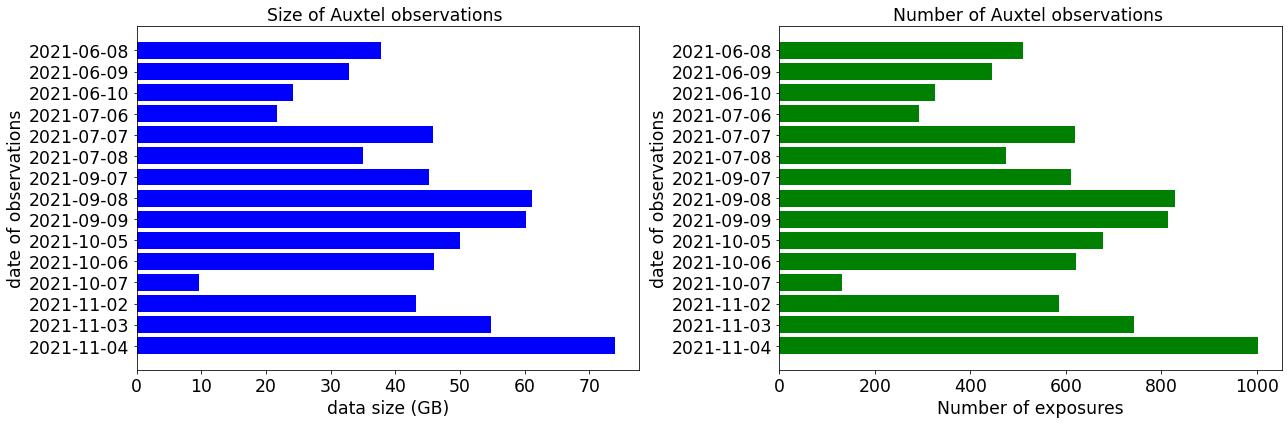

In [99]:
fig = plt.figure(figsize=(18,6))
ax=fig.add_subplot(121)
ax.barh(list_of_dirs,all_pathsize,facecolor="b")
plt.gca().invert_yaxis()
ax.set_ylabel("date of observations")
ax.set_xlabel("data size (GB)")
ax.set_title("Size of Auxtel observations ")
ax=fig.add_subplot(122)
ax.barh(list_of_dirs,all_filescount,facecolor="g")
plt.gca().invert_yaxis()
ax.set_ylabel("date of observations")
ax.set_xlabel("Number of exposures")
ax.set_title("Number of Auxtel observations ")

plt.tight_layout()

Text(0.5, 1.0, 'Number of Auxtel observations ')

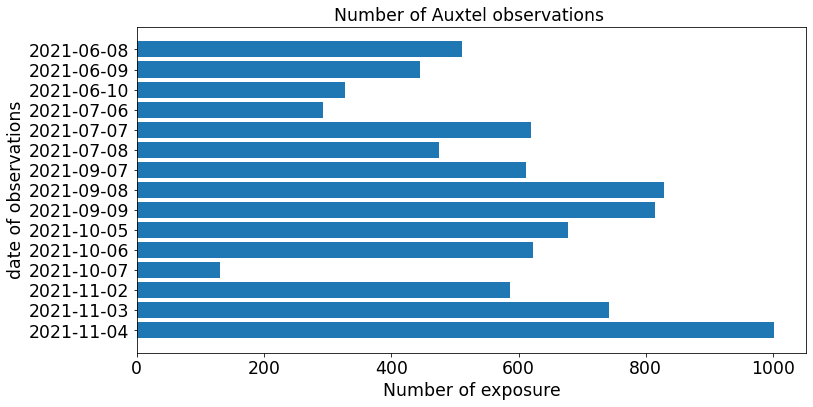

In [90]:
plt.figure(figsize=(12,6))
plt.barh(list_of_dirs,all_filescount)
plt.gca().invert_yaxis()
plt.ylabel("date of observations")
plt.xlabel("Number of exposure")
plt.title("Number of Auxtel observations ")